<a href="https://colab.research.google.com/github/Nanangk/Deep_Autoencoder_Implementation_with_Keras/blob/master/Deep_Autoencoder_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Deep Autoencoder Implementation

This project aim to implementation of Deep Autoencoder with Keras, this project use fashion mnist dataset from keras

Fashion mnist is is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. This dataset can be used as a drop-in replacement for MNIST. 

The class labels are:

Label	Description
0.	T-shirt/top
1.	Trouser
2.	Pullover
3.	Dress
4.	Coat
5.	Sandal
6.	Shirt
7.	Sneaker
8.	Bag
9.	Ankle boot 

<h3>What is Autoencoder?</h3>
Autoencoder is one of type neural network where the input is same as the output, autoencoder learn the input data and reconstruct the input data, autoencoder used for dimensionality reduction

![Autoencoder](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRj6teOvotqH0V03TJsL5avWnHWSUBFlJUJIgSjrdff2dz3ca5C&usqp=CAU)

In [1]:
#import library
from keras.datasets import fashion_mnist
from keras.layers import Input, Dense
from keras.models import Model

Using TensorFlow backend.


In [2]:
#Load Dataset
(x_train, _), (x_test, _) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 0us/step


In [3]:
#Rescale  dataset
import numpy as np

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [4]:
#Build Autoencoder Model

target_dimension = 16

#Encoder
input_img = Input(shape=(784,))
encoder = Dense(128, activation='relu')(input_img)
encoder = Dense(64, activation='relu')(encoder)
encoder = Dense(32, activation='relu')(encoder)

#code
coded = Dense(target_dimension, activation='relu')(encoder)

#Decoder
decoder = Dense(32, activation='relu')(coded)
decoder = Dense(64, activation='relu')(decoder)
decoder = Dense(128, activation='relu')(decoder)
decoder = Dense(784, activation='sigmoid')(decoder)

autoencoder = Model(input_img, decoder)

In [5]:
#compile model
autoencoder.compile(loss = 'binary_crossentropy',
                    optimizer = 'adam')

In [6]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_6 (Dense)              (None, 64)                2112

In [7]:
#Training model
autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=100,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 119us/step - loss: 0.3610 - val_loss: 0.3151
Epoch 2/20
60000/60000 [==============================] - 7s 111us/step - loss: 0.3077 - val_loss: 0.3058
Epoch 3/20
60000/60000 [==============================] - 7s 109us/step - loss: 0.3004 - val_loss: 0.3000
Epoch 4/20
60000/60000 [==============================] - 7s 109us/step - loss: 0.2969 - val_loss: 0.2976
Epoch 5/20
60000/60000 [==============================] - 7s 109us/step - loss: 0.2948 - val_loss: 0.2958
Epoch 6/20
60000/60000 [==============================] - 6s 107us/step - loss: 0.2933 - val_loss: 0.2946
Epoch 7/20
60000/60000 [==============================] - 7s 109us/step - loss: 0.2920 - val_loss: 0.2936
Epoch 8/20
60000/60000 [==============================] - 7s 109us/step - loss: 0.2909 - val_loss: 0.2931
Epoch 9/20
60000/60000 [==============================] - 7s 110us/step - loss: 0.2900 - val_loss: 0.2

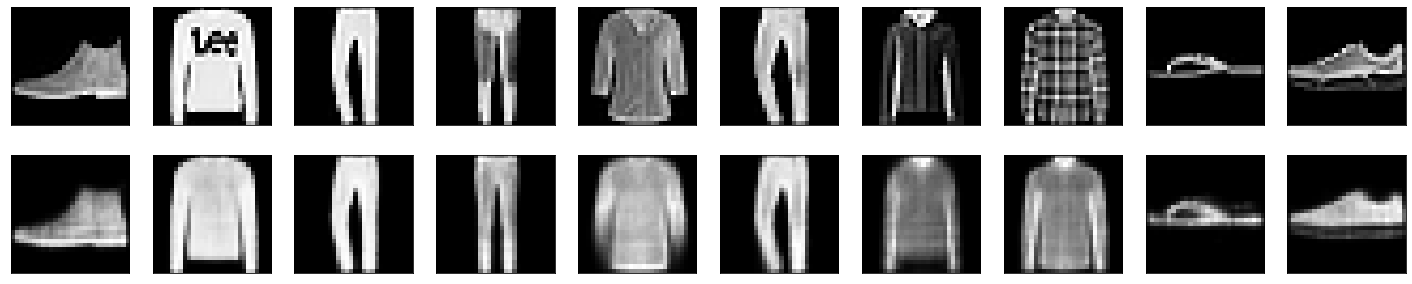

In [9]:
#Display original data and reconstruction data
import matplotlib.pyplot as plt
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(25, 5))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i+1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()